In [160]:
using LinearAlgebra
using Plots
using SparseArrays
using Pkg
using Arpack
using PyPlot
using Random
using Distributions
using Statistics
using BenchmarkTools

In [162]:

m = 1
N = 10
vxs = ones(N)

D = LinRange(-0.1,0.1,100000)
T = []
mean_v = []
Demon = []
rest = []
push!(T, 0.5*m*dot(vxs, vxs))
push!(mean_v, mean(vxs))
push!(Demon, 0.0)

for i in 1:10000
    T_i = T[length(T)]
    
    d = rand(1:length(D))
    
    δ = D[rand(1:length(D))]
     k = rand(1:length(vxs))
    
    vxs[k] +=  δ
    
    meanV = mean(vxs)
    T_f = 0.5*m*dot(vxs, vxs)
    
    dT = T_f - T_i
    
    if dT < 0
        push!(Demon, Demon[length(Demon)] - dT)
    else
        if Demon[length(Demon)] > dT
            push!(Demon, Demon[length(Demon)] - dT )
        else
            push!(Demon,Demon[length(Demon)] )
            vxs[k] -= δ
            
        end
    end
    
    T_f = 0.5*m*dot(vxs, vxs)
    push!(T, T_f)
    push!(mean_v, meanV)
end


In [164]:
function K()
    m = 1
    N = 10
    vxs = ones(N)

    D = LinRange(-0.1,0.1,100000)
    T = []
    mean_v = []
    Demon = []
    rest = []
    push!(T, 0.5*m*dot(vxs, vxs))
    push!(mean_v, mean(vxs))
    push!(Demon, 0.0)

    for i in 1:10000
        T_i = T[length(T)]

        d = rand(1:length(D))

        δ = D[rand(1:length(D))]
         k = rand(1:length(vxs))

        vxs[k] +=  δ

        meanV = mean(vxs)
        T_f = 0.5*m*dot(vxs, vxs)

        dT = T_f - T_i

        if dT < 0
            push!(Demon, Demon[length(Demon)] - dT)
        else
            if Demon[length(Demon)] > dT
                push!(Demon, Demon[length(Demon)] - dT )
            else
                push!(Demon,Demon[length(Demon)] )
                vxs[k] -= δ

            end
        end

        T_f = 0.5*m*dot(vxs, vxs)
        push!(T, T_f)
        push!(mean_v, meanV)
    end
end

@benchmark K()

BenchmarkTools.Trial: 2658 samples with 1 evaluation.
 Range (min … max):  1.194 ms … 9.899 ms  ┊ GC (min … max):  0.00% … 68.42%
 Time  (median):     1.612 ms             ┊ GC (median):     0.00%
 Time  (mean ± σ):   1.875 ms ± 1.036 ms  ┊ GC (mean ± σ):  10.12% ± 14.17%

   ▃█▇▃▂                                                     
  ▅██████▆▅▄▃▃▃▂▂▂▂▂▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂ ▃
  1.19 ms        Histogram: frequency by time       7.13 ms <

 Memory estimate: 1.71 MiB, allocs estimate: 49539.

In [126]:
mD = mean(Demon)
mT = mean(T)/N
mT/mD

0.5159693653778833

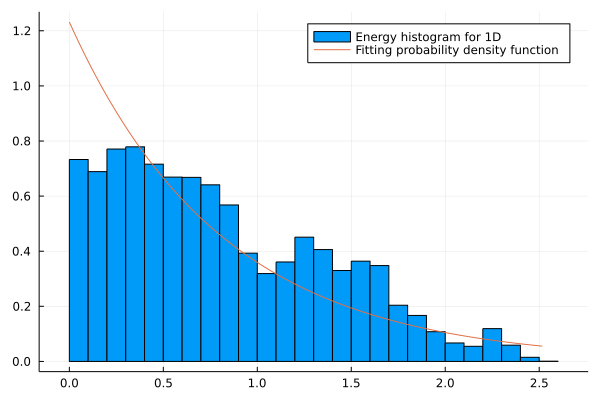

In [127]:
fit_1 = fit_mle(Exponential, convert.(Float64 ,Demon))
θ = params(fit_1)[1]
t = LinRange(0,maximum(Demon),1000)

#histogram(Demon, normalize = true)
#plot!(t,exp.(-t/θ)/θ )

histogram(Demon, normalize = true, density = true, label = "Energy histogram for 1D")
plot!(t,exp.(-t/θ)/θ, label = "Fitting probability density function" )


In [131]:
m = 1
N = 10
v0 = 1
ϕ = LinRange(0,2*pi,10000)
θ = rand(ϕ,10)
vxs = v0*cos.(θ)
vys = v0*sin.(θ)

D = LinRange(-0.1,0.1,100000)
T2 = []
#mean_v = []
Demon2 = []
rest = []

push!(T2, 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys))
push!(Demon2, 0.0)

for i in 1:10000
    T_i = T2[length(T2)]
    
    d = rand(1:length(D))
    
    δ = D[rand(1:length(D))]
     k = rand(1:N)
    
    
    ϕ = LinRange(0,2*pi,10000)
    t = rand(ϕ,1)[1]
    
    vxs[k] +=  δ*cos(t)
    vys[k] +=  δ*sin(t)
    
    #meanV = mean(vxs)
    T_f = 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys)
    
    dT = T_f - T_i
    
    if dT < 0
        push!(Demon2, Demon2[length(Demon2)] - dT)
    else
        if Demon2[length(Demon2)] > dT
            push!(Demon2, Demon2[length(Demon2)] - dT )
        else
            push!(Demon2,Demon2[length(Demon2)] )
            vxs[k] -=  δ*cos(t)
            vys[k] -=  δ*sin(t)
            
        end
    end
    T_f = 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys)
    push!(T2, T_f)
    #push!(mean_v, meanV)
end
        
     

In [165]:
function K()
    m = 1
    N = 10
    v0 = 1
    ϕ = LinRange(0,2*pi,10000)
    θ = rand(ϕ,10)
    vxs = v0*cos.(θ)
    vys = v0*sin.(θ)

    D = LinRange(-0.1,0.1,100000)
    T2 = []
    #mean_v = []
    Demon2 = []
    rest = []

    push!(T2, 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys))
    push!(Demon2, 0.0)

    for i in 1:10000
        T_i = T2[length(T2)]

        d = rand(1:length(D))

        δ = D[rand(1:length(D))]
         k = rand(1:N)


        ϕ = LinRange(0,2*pi,10000)
        t = rand(ϕ,1)[1]

        vxs[k] +=  δ*cos(t)
        vys[k] +=  δ*sin(t)

        #meanV = mean(vxs)
        T_f = 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys)

        dT = T_f - T_i

        if dT < 0
            push!(Demon2, Demon2[length(Demon2)] - dT)
        else
            if Demon2[length(Demon2)] > dT
                push!(Demon2, Demon2[length(Demon2)] - dT )
            else
                push!(Demon2,Demon2[length(Demon2)] )
                vxs[k] -=  δ*cos(t)
                vys[k] -=  δ*sin(t)

            end
        end
        T_f = 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys)
        push!(T2, T_f)
        #push!(mean_v, meanV)
    end

     
end

@benchmark K()

BenchmarkTools.Trial: 1659 samples with 1 evaluation.
 Range (min … max):  1.927 ms … 10.664 ms  ┊ GC (min … max): 0.00% … 57.38%
 Time  (median):     2.748 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.000 ms ±  1.269 ms  ┊ GC (mean ± σ):  7.55% ± 13.06%

   ▄█▇▄▃▆▆▄▂                                                  
  ▇█████████▇▆▅▅▄▃▃▃▃▃▂▃▂▂▂▂▁▂▁▁▁▁▁▁▁▂▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂ ▃
  1.93 ms        Histogram: frequency by time        9.25 ms <

 Memory estimate: 1.85 MiB, allocs estimate: 49504.

In [135]:
mD = mean(Demon2)
mT = mean(T2)/N
mT/mD

1.0221827751854207

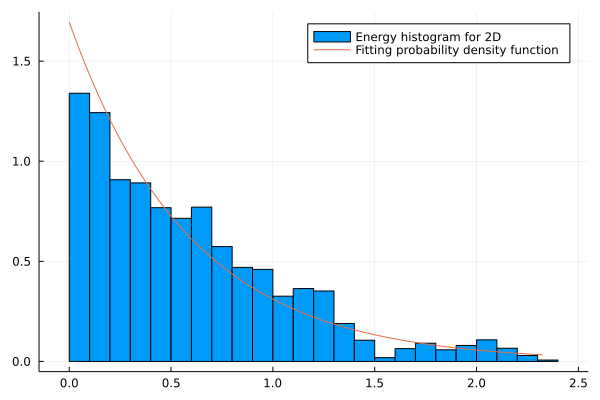

In [99]:
fit_2 = fit_mle(Exponential, convert.(Float64 ,Demon2))
θ2 = params(fit_2)[1]
t = LinRange(0,maximum(Demon2),1000)
histogram(Demon2, normalize = true, density = true, label = "Energy histogram for 2D")
plot!(t,exp.(-t/θ2)/θ2, label = "Fitting probability density function" )

In [47]:
#histogram(Demon2, normalize = true)

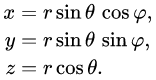






In [152]:
m = 1
N = 10
v0 = 1
ϕ = LinRange(0,2*pi,10000)
l =  LinRange(0,pi,10000)


θ = rand(l,10)
ψ = rand(ϕ,10)



vxs = v0*sin.(θ).*cos.(ψ)
vys = v0*sin.(θ).*sin.(ψ)
vzs = v0*cos.(θ)

D = LinRange(-0.1,0.1,100000)
T3 = []
#mean_v = []
Demon3 = []
rest = []

push!(T3, 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys) + 0.5*m*dot(vzs, vzs))
push!(Demon3, 0.0)

for i in 1:10000
    T_i = T3[length(T3)]
    
    d = rand(1:length(D))
    
    δ = D[rand(1:length(D))]
     k = rand(1:N)
    
    
    ϕ = LinRange(0, 2*pi,10000)
    l =  LinRange(0, pi,10000)
    t = rand(ϕ,1)[1]
    q = rand(l, 1)[1]
    
    vxs[k] +=  δ*sin(q)*cos(t)
    vys[k] +=  δ*sin(q)*sin(t)
    vzs[k] +=  δ*cos(q)
    
    #meanV = mean(vxs)
    T_f = 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys) + 0.5*m*dot(vzs, vzs)
    
    dT = T_f - T_i
    
    if dT < 0
        push!(Demon3, Demon3[length(Demon3)] - dT)
    else
        if Demon3[length(Demon3)] > dT
            push!(Demon3, Demon3[length(Demon3)] - dT )
        else
            push!(Demon3,Demon3[length(Demon3)] )
            vxs[k] -=  δ*sin(q)*cos(t)
            vys[k] -=  δ*sin(q)*sin(t)
            vzs[k] -=  δ*cos(q)
            
        end
    end
    T_f = 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys) + 0.5*m*dot(vzs, vzs)
    push!(T3, T_f)
    #push!(mean_v, meanV)
end
           


In [166]:
function K()
    m = 1
    N = 10
    v0 = 1
    ϕ = LinRange(0,2*pi,10000)
    l =  LinRange(0,pi,10000)


    θ = rand(l,10)
    ψ = rand(ϕ,10)



    vxs = v0*sin.(θ).*cos.(ψ)
    vys = v0*sin.(θ).*sin.(ψ)
    vzs = v0*cos.(θ)

    D = LinRange(-0.1,0.1,100000)
    T3 = []
    #mean_v = []
    Demon3 = []
    rest = []

    push!(T3, 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys) + 0.5*m*dot(vzs, vzs))
    push!(Demon3, 0.0)

    for i in 1:10000
        T_i = T3[length(T3)]

        d = rand(1:length(D))

        δ = D[rand(1:length(D))]
         k = rand(1:N)


        ϕ = LinRange(0, 2*pi,10000)
        l =  LinRange(0, pi,10000)
        t = rand(ϕ,1)[1]
        q = rand(l, 1)[1]

        vxs[k] +=  δ*sin(q)*cos(t)
        vys[k] +=  δ*sin(q)*sin(t)
        vzs[k] +=  δ*cos(q)

        #meanV = mean(vxs)
        T_f = 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys) + 0.5*m*dot(vzs, vzs)

        dT = T_f - T_i

        if dT < 0
            push!(Demon3, Demon3[length(Demon3)] - dT)
        else
            if Demon3[length(Demon3)] > dT
                push!(Demon3, Demon3[length(Demon3)] - dT )
            else
                push!(Demon3,Demon3[length(Demon3)] )
                vxs[k] -=  δ*sin(q)*cos(t)
                vys[k] -=  δ*sin(q)*sin(t)
                vzs[k] -=  δ*cos(q)

            end
        end
        T_f = 0.5*m*dot(vxs, vxs) + 0.5*m*dot(vys, vys) + 0.5*m*dot(vzs, vzs)
        push!(T3, T_f)
        #push!(mean_v, meanV)
    end

     
end

@benchmark K()

BenchmarkTools.Trial: 1477 samples with 1 evaluation.
 Range (min … max):  2.311 ms … 17.551 ms  ┊ GC (min … max): 0.00% …  0.00%
 Time  (median):     3.023 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.376 ms ±  1.359 ms  ┊ GC (mean ± σ):  8.12% ± 13.90%

  ▄▆▇▇███▇▇▆▆▅▄▂▁                                            ▁
  █████████████████▄▆▆▆█▆▅▅▆▅▄▁▁▄▄▅▁▄▅▁▁▁▁▄▄▄▆█▇▄▇▆▆▇▇▆▆▆▆▇▇ █
  2.31 ms      Histogram: log(frequency) by time     8.82 ms <

 Memory estimate: 2.46 MiB, allocs estimate: 59468.

In [156]:
mD = mean(Demon3)
mT = mean(T3)/N
mT/mD

1.5065585297237525

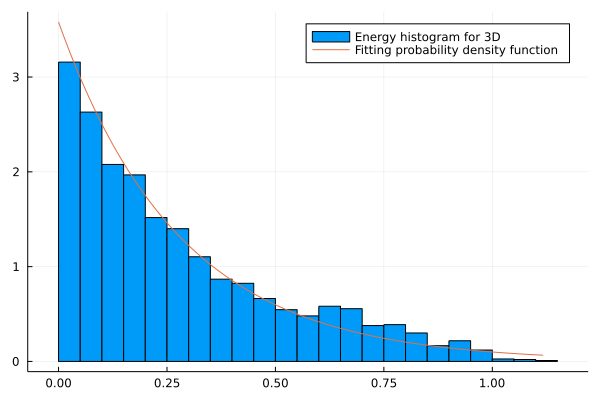

In [138]:
fit_3 = fit_mle(Exponential, convert.(Float64 ,Demon3))
θ3 = params(fit_3)[1]
t = LinRange(0,maximum(Demon3),1000)
histogram(Demon3, normalize = true, density = true, label = "Energy histogram for 3D")
plot!(t,exp.(-t/θ3)/θ3, label = "Fitting probability density function" )